In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Configuration
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

If the GPU is not showing like now, you need to do the following steps : https://www.tensorflow.org/install/pip

In [3]:
#If Tensorflow is build with Cuda
tf.test.is_built_with_cuda()

True

In [4]:
#Choose a data set

We will choose a dataset from Keras, link : https://keras.io/api/datasets/
- We will choose CIFAR10 small images classification dataset

In [5]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape
#50000 !
#32*32 picture
#each image has 3 colors (red, green blue)

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [9]:
#1 to 9 here are image classes

In [10]:
#Create a class to show img

def img(x):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[x])

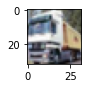

In [11]:
img(1)

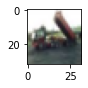

In [12]:
img(2)

- Nous allons crée une variable classes afin d'enregistrer les classes de 0 à 9 selon leur répartition sur Keras.
- L'objectif est de faciliter la lecture apr la suite des résultats

In [25]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

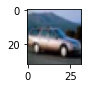

In [26]:
img(4)

The fourth picture looks like a car

In [27]:
y_train[4]
#We don't need an array, we need the first element of it (highest probability)

array([1], dtype=uint8)

In [29]:
classes[y_train[4][0]]
#We will compare the result with y_train and take only the 1st element of the list
#The result is automotive!

'automobile'

## Scaling images

We are going to divide the images by 255, because the RGB values are 0 to 255

In [30]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

You can see that each pixel has a value between 0 to 255, in order to reduce the value distance, we will transform the data into a value between 0 to 1 by devising by 255

In [31]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

- Values are now between 0 to 1
- The operation greatly facilitates the training of the DeepLearning model

In [33]:
X_train_scaled = X_train/255
X_test_scaled =  X_test/255

We don't need to touch y_train or y_test because it's the class labels that are between 0 to 9

In [34]:
X_train_scaled.shape

(50000, 32, 32, 3)

Shape still the same as before, the value changed from 0 to 255 to 0 to 1

## Encoding the value of Y

We need the value of Y be an array of all the class not only the one with the highest probability

In [35]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

- You can see that we have results from 0 to 9
- We will use Keras to transform the values of y into a category
- The class number is 10 (from 0 to 9)
- datatype is float

In [36]:
y_train_categorical = keras.utils.to_categorical(
y_train, num_classes=10, dtype ='float32')

In [37]:
y_train_categorical[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

- Now we don't only have the values 6,9,9 on the first 3 rows, but each class has a column, so 10 columns (for each class) with the number 1 in one column which corresponds to the classification
- We had first 6, you can see that there are five "0" before the 1, because the first is classified as the 6th class, and therefore the 1 appears in the 6th columns
- This operation is called OneHotEncoding

In [38]:
y_test_categorical = keras.utils.to_categorical(
y_test, num_classes=10, dtype ='float32')

# Model

In [41]:
#We need to flatten the input into 1 array
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)), #from 3D to 1D 32*32*3 to 3072
      keras.layers.Dense(500, activation='relu'),   #Hidden Layer (read work better for HL)
      keras.layers.Dense(10, activation='sigmoid') #for classification 'output layer', we have 10 classes
])

model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy', #we changed the value of y to categorical
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=50)

#It will use GPU by default

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8577 - accuracy: 0.3389
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6847 - accuracy: 0.4098
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6104 - accuracy: 0.4368
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5593 - accuracy: 0.4539
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5154 - accuracy: 0.4687
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4813 - accuracy: 0.4834
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4500 - accuracy: 0.4919
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4210 - accuracy: 0.5050
Epoch 9/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3975 - accuracy: 0.5110
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.375

# Prediction

In [52]:
model.predict(X_test_scaled)[2]

313/313 [==============================] - 0s 1ms/step


array([0.9956637 , 0.9227676 , 0.2866095 , 0.11459236, 0.1540393 ,
       0.13172553, 0.0058299 , 0.2124616 , 0.970647  , 0.8926997 ],
      dtype=float32)

In [53]:
#We want the highest probability
np.argmax(model.predict(X_test_scaled)[2])

313/313 [==============================] - 0s 978us/step


0

In [54]:
#We want the classe
classes[np.argmax(model.predict(X_test_scaled)[2])]

313/313 [==============================] - 0s 1ms/step


'airplane'

Comparaison with y_test

In [55]:
classes[y_test[2][0]]

'ship'

The model is terrible xD

In [57]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.4391 - accuracy: 0.5210


[1.4391300678253174, 0.5210000276565552]

In [58]:
#Create a model function to run it on CPU and GPU

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [59]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [64]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_test = get_model()
    cpu_test.fit(X_train_scaled,y_train_categorical, epochs=1)

1563/1563 [==============================] - 52s 33ms/step - loss: 1.8103 - accuracy: 0.3554
52.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [66]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 6s 3ms/step - loss: 1.8119 - accuracy: 0.3544
6.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
